In [216]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report, confusion_matrix  
from IPython.display import Image
from sklearn.decomposition import PCA
import pydotplus
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from scipy import interp

In [217]:
df = pd.read_csv('./creditcardcsvpresent.csv')
yes_no_mapping = {'Y':1, 'N':0}
df['Is declined'] = df['Is declined'].map(yes_no_mapping)
df['isForeignTransaction'] = df['isForeignTransaction'].map(yes_no_mapping)
df['isHighRiskCountry'] = df['isHighRiskCountry'].map(yes_no_mapping)
df['isFradulent'] = df['isFradulent'].map(yes_no_mapping)
feature_list=df.columns[2:]
feature_list

Index(['Average Amount/transaction/day', 'Transaction_amount', 'Is declined',
       'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq', 'isFradulent'],
      dtype='object')

In [218]:
df.shape

(3075, 12)

In [219]:
df.isnull().values.any()

True

In [220]:
df.drop('Merchant_id',axis=1, inplace=True)
df.drop('Transaction date',axis=1, inplace=True)

In [221]:
df.head()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,500.0,26000.0,0,0,1,1,800,677.2,6,1


In [222]:
df.describe()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
count,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,515.026556,9876.399210,0.018537,0.957398,0.229593,0.066667,55.737561,40.022407,0.391870,0.145691
std,291.906978,10135.331016,0.134903,2.192391,0.420640,0.249484,206.634779,155.968840,1.548479,0.352854
min,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2000.000000,108000.000000,1.000000,20.000000,1.000000,1.000000,998.000000,998.000000,9.000000,1.000000


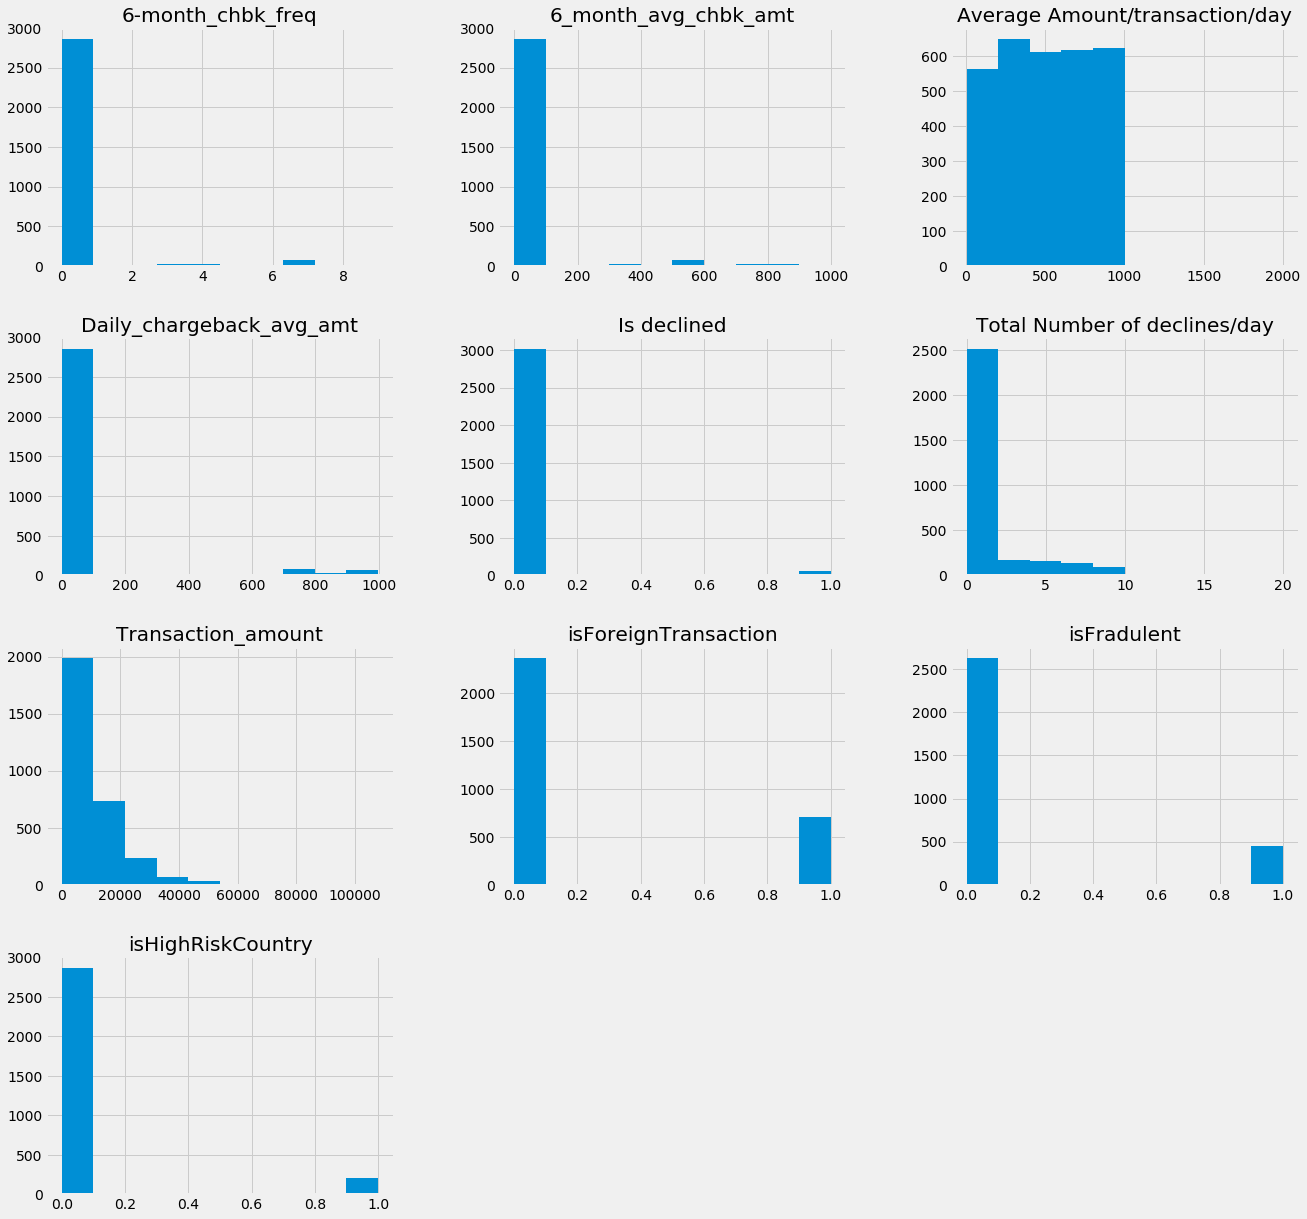

In [223]:
df.hist(figsize=(20,20))
plt.show()

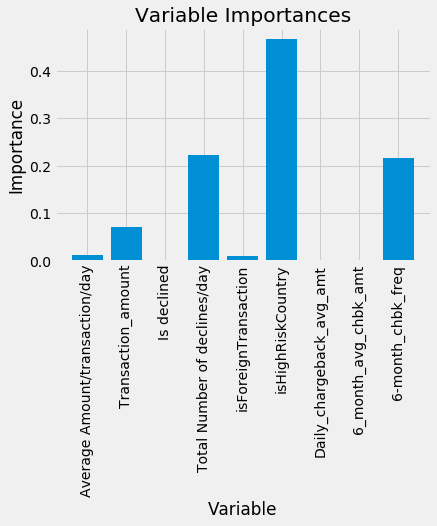

In [224]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [225]:
# Get numerical feature importances
importances = list(tree.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: isHighRiskCountry    Importance: 0.47
Variable: Total Number of declines/day Importance: 0.22
Variable: 6-month_chbk_freq    Importance: 0.22
Variable: Transaction_amount   Importance: 0.07
Variable: Average Amount/transaction/day Importance: 0.01
Variable: isForeignTransaction Importance: 0.01
Variable: Is declined          Importance: 0.0
Variable: Daily_chargeback_avg_amt Importance: 0.0
Variable: 6_month_avg_chbk_amt Importance: 0.0


In [226]:
y =  df.values[:,-1]
X =  df.values[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
tree = DecisionTreeClassifier(criterion='gini', min_samples_leaf= 5, min_impurity_decrease = 0, max_depth=6)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
print('Accuracy on train data: {}%'.format(accuracy_score(y_train, y_train_pred) * 100))
print('Accuracy on test data: {}%'.format(accuracy_score(y_test, y_test_pred) * 100))

Accuracy on train data: 98.09479553903346%
Accuracy on test data: 97.39978331527628%


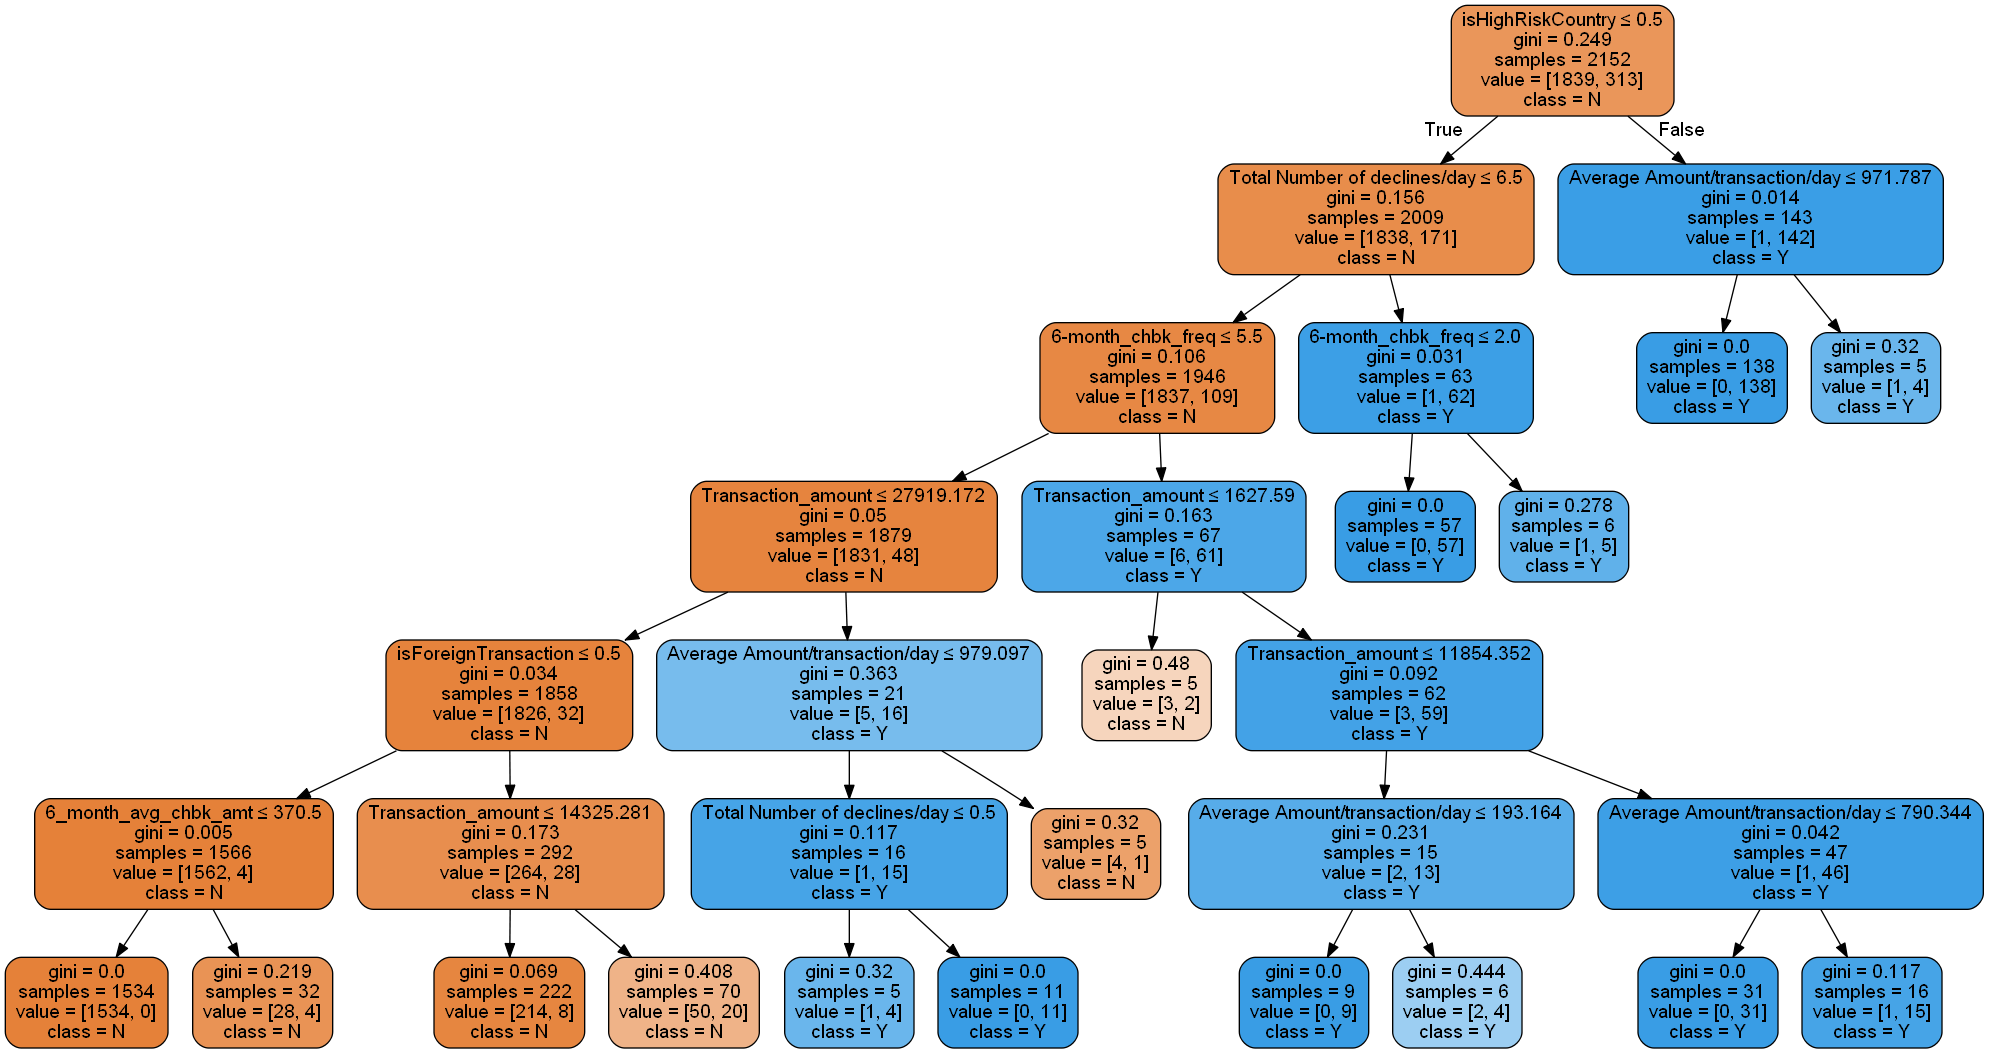

In [237]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=df.columns[:-1], 
                filled=True, rounded=True,
                special_characters=True, class_names=['N','Y'],
               impurity=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Confusion matrix, without normalization
[[783   5]
 [ 19 116]]
Normalized confusion matrix
[[0.99 0.01]
 [0.14 0.86]]


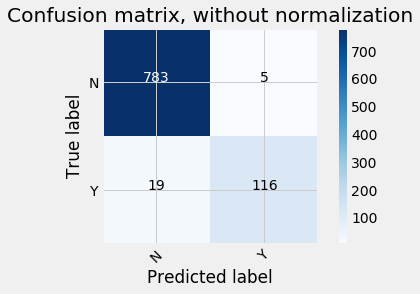

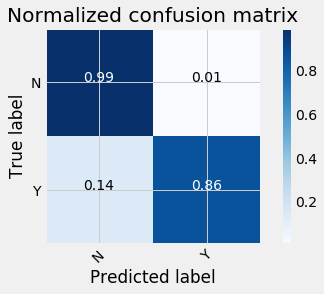

In [228]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['N','Y'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['N','Y'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [229]:
precision_recall_fscore_support(y_test, y_test_pred)

(array([0.98, 0.96]),
 array([0.99, 0.86]),
 array([0.98, 0.91]),
 array([788, 135], dtype=int64))

In [230]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred)) 

[[783   5]
 [ 19 116]]
             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98       788
        1.0       0.96      0.86      0.91       135

avg / total       0.97      0.97      0.97       923



In [231]:
average_precision = average_precision_score(y_test, y_test_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.84


Text(0.5,1,'2-class Precision-Recall curve: AP=0.84')

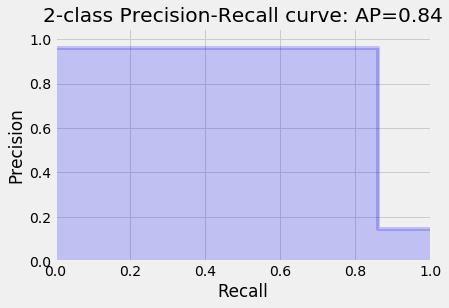

In [232]:
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

0.9846493701823651


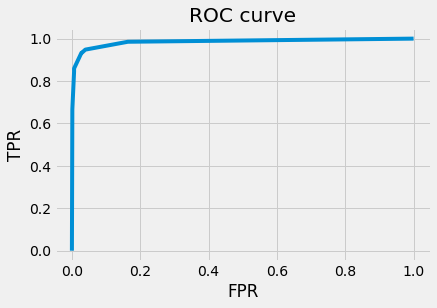

In [233]:

predictions = tree.predict_proba(X_test)

print (roc_auc_score(y_test, predictions[:,1]))

fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [234]:
y_result = tree.predict([[804.7617661,42652.3736,0,0,0,0,953,950,8]])
print(y_result)

[1.]


In [235]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_score[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

TypeError: 'function' object is not subscriptable

<Figure size 432x288 with 0 Axes>

In [ ]:
# The baseline predictions are the historical averages
baseline_preds = y_train[:, y_test.index('isHighRiskCountry')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))